# Análisis estadístico

## Obtención de base de datos

In [1422]:
import mysql.connector as connection
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

In [1423]:
def queryDF(q) -> pd.DataFrame:
    try:
        mydb = connection.connect(host="localhost", database = 'practica',user="root", passwd="root", use_pure=True)
        result_dataFrame = pd.read_sql(q, mydb)
    except Exception as e:
        print('Excepcion', str(e))
        result_dataFrame = None
    finally:
        mydb.close()
    return result_dataFrame

In [1424]:
empleados = queryDF('select * from em_empleados')
proyectos = queryDF('select * from pr_proyectos')
asignaciones = queryDF('select * from pr_empleados_proyecto')

C:\Users\eyuste\AppData\Local\Temp\ipykernel_6180\2671971924.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  result_dataFrame = pd.read_sql(q, mydb)


In [1425]:
empleados.head()

,B_SERVMILITAR,CX_EDOCIVIL,F_ALTA,F_BAJA,F_NACIMIENTO,ID_EMPLEADO,N_TELEFONO1,N_TELEFONO2,TX_APELLIDO1,TX_APELLIDO2,TX_EMAIL,TX_NIF,TX_NOMBRE
0,S,S,1976-10-13,2023-08-22,1986-02-18,1,692689213,113061401,White,Phillips,alfred.white@gmail.com,88953399G,Alfred
1,N,S,1993-07-18,None,1993-03-25,2,737703731,888164547,Hamilton,Welch,leila.hamilton@gmail.com,42401933C,Leila
2,N,S,1996-08-18,None,1978-10-23,3,296471891,287356859,Fletcher,Wilson,bertie.fletcher@gmail.com,52971090P,Bertie
3,N,S,1981-01-09,1982-10-06,1991-10-17,4,730624863,107483452,Adkins,Butler,barry.adkins@gmail.com,41056311G,Barry
4,S,C,2001-12-20,2018-03-17,1979-06-16,5,129462402,815307334,Morgan,Bates,emma.morgan@gmail.com,70090020R,Emma


## Estadísticas

#### Empleados
- Top 5 empleados que más años llevan en la compañía
- Top 5 empleados más recientes
- Distribución del número de años de los empleados en la empresa
- Evolución temporal de altas por años
- Evolución temporal de bajas por años (se puede combinar con la anterior si se desea)
- ¿Cuáles han sido los dos años de mayor crecimiento/decrecimiento de empleados?
- Distribución de empleados solteros vs casados
- Distribución de la edad de los empleados
- Edad media y desviación típica de los empleados

#### Proyectos
- Número de proyectos activos, finalizados y total
- Distribución de la duración de los proyectos (histograma)
- Distribución de proyectos por lugar

#### Proyectos y Empleados
- Distribución del número de proyectos a los que están asignados los empleados en activo. 
- Ejemplo: 
	- Personas asignadas a 1 proyecto: 54, 
	- Personas asignadas a 2 proyectos: 12,
	- Personas asignadas a 3 proyectos: 2
- Top 5 proyectos con más personas asignadas
- Lista de proyectos sin personas asignadas (detección de anomalía)  


### Empleados

#### Top 5 empleados que más años llevan en la compañía

In [1426]:
# No dados de baja
disponibles = empleados.loc[empleados['F_BAJA'].isna()].copy()
# Ordenar por antiguedad
ordenados = disponibles.sort_values(['F_ALTA'])[
    ['TX_NIF', 'TX_NOMBRE', 'TX_APELLIDO1', 'TX_APELLIDO2', 'TX_EMAIL', 'F_ALTA']]
# Limitar a los 5
top5MasAnyos = ordenados.head(5)
top5MasAnyos

,TX_NIF,TX_NOMBRE,TX_APELLIDO1,TX_APELLIDO2,TX_EMAIL,F_ALTA
95,14153748T,Jonathan,Higgins,Burgess,jonathan.higgins@gmail.com,1946-03-03
86,18178099P,Franklin,Daniel,Townsend,franklin.daniel@gmail.com,1946-10-05
61,26754843V,Hattie,Hopkins,McBride,hattie.hopkins@gmail.com,1952-01-14
72,65770597D,Cecilia,Boyd,Wells,cecilia.boyd@gmail.com,1953-06-13
30,47986253B,Jeffrey,Soto,Perry,jeffrey.soto@gmail.com,1954-02-14


#### Top 5 empleados más recientes

In [1427]:
# No dados de baja
disponibles = empleados.loc[empleados['F_BAJA'].isna()].copy()
# Ordenar por antiguedad
ordenados = disponibles.sort_values(['F_ALTA'], ascending=False)[
    ['TX_NIF', 'TX_NOMBRE', 'TX_APELLIDO1', 'TX_APELLIDO2', 'TX_EMAIL', 'F_ALTA']]
# Limitar a los 5
top5MasRecientes = ordenados.head(5)
top5MasRecientes

,TX_NIF,TX_NOMBRE,TX_APELLIDO1,TX_APELLIDO2,TX_EMAIL,F_ALTA
46,87541974K,Devin,Bailey,Hunt,devin.bailey@gmail.com,2014-08-09
40,13761491E,Isabelle,Lloyd,Jones,isabelle.lloyd@gmail.com,2014-07-20
70,83007275T,Isabelle,Allen,Cruz,isabelle.allen@gmail.com,2013-07-22
65,45848829G,Amanda,Hardy,Scott,amanda.hardy@gmail.com,2011-02-02
13,66005749T,Mary,McCarthy,Stevens,mary.mccarthy@gmail.com,2009-06-24


#### Distribución del número de años de los empleados en la empresa

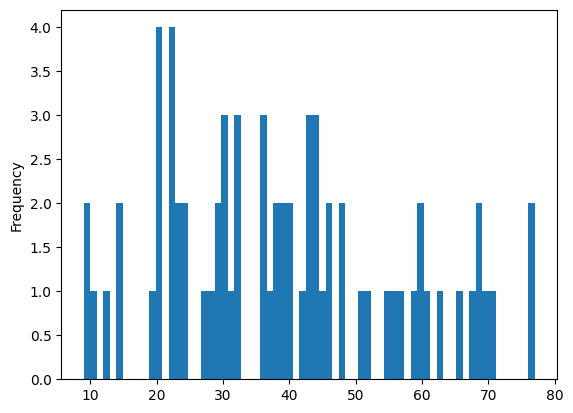

In [1428]:
# No dados de baja
disponibles = empleados.loc[empleados['F_BAJA'].isna()].copy()
# Numero de años
anyosAlta = disponibles['F_ALTA'].astype('str').str.split('-').str[0].astype('int')
nAnyos = 2023 - anyosAlta

nAnyos.plot.hist(bins=nAnyos.max() - nAnyos.min() + 1)
plt.show()

#### Evolución temporal de altas por años y Evolución temporal de bajas por años

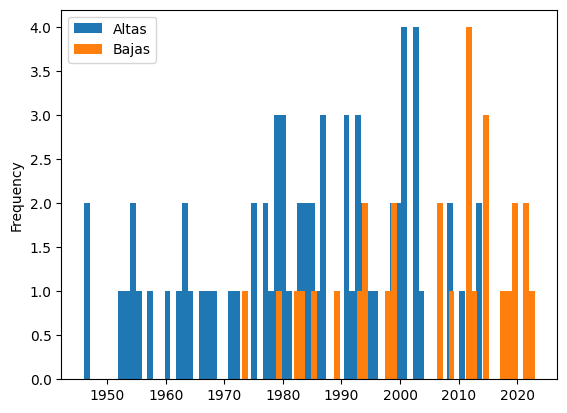

In [1429]:
# Dados de baja
deBaja = empleados.loc[empleados['F_BAJA'].notna()].copy()
anyosBaja = deBaja['F_BAJA'].astype('str').str.split('-').str[0].astype('int')

anyosAlta.plot.hist(bins=anyosAlta.max() - anyosAlta.min() + 1, label='Altas')
anyosBaja.plot.hist(bins=anyosBaja.max() - anyosBaja.min() + 1, label='Bajas')
plt.legend()
plt.show()


#### ¿Cuáles han sido los dos años de mayor crecimiento/decrecimiento de empleados?

In [1430]:
anyosCrecimiento = anyosAlta.value_counts().sort_values(ascending=False).head(2).reset_index()
anyosDecrecimiento = anyosBaja.value_counts().sort_values(ascending=False).head(2).reset_index()

print(
    'Mayor crecimiento: ',
    ', '.join([
        f'{y} con {n} altas'
        for y, n in zip(anyosCrecimiento['F_ALTA'], anyosCrecimiento['count'])]))

print(
    'Mayor decrecimiento: ',
    ', '.join([
        f'{y} con {n} bajas'
        for y, n in zip(anyosDecrecimiento['F_BAJA'], anyosDecrecimiento['count'])]))


Mayor crecimiento:  2001 con 4 altas, 2003 con 4 altas
Mayor decrecimiento:  2012 con 4 bajas, 2015 con 3 bajas



#### Distribución de empleados solteros vs casados

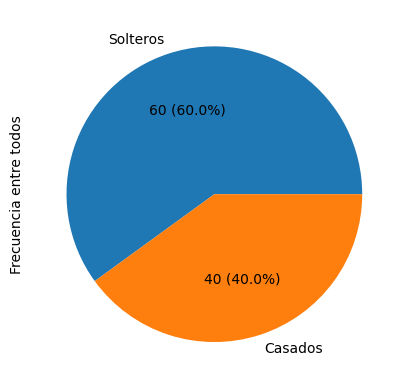

In [1431]:
ecivil = empleados['CX_EDOCIVIL'].value_counts()
ecivil = ecivil
ecivil.plot.pie(
    label='Frecuencia entre todos',
    labels = ['Solteros', 'Casados'],
    autopct=lambda x: f'{round(x * len(empleados) / 100)} ({round(x, 2)}%)')
plt.show()

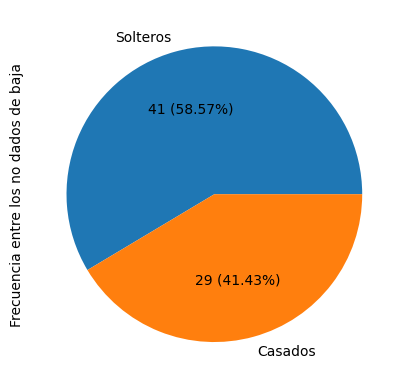

In [1432]:
ecivil = disponibles['CX_EDOCIVIL'].value_counts()
ecivil = ecivil
ecivil.plot.pie(
    label='Frecuencia entre los no dados de baja',
    labels = ['Solteros', 'Casados'],
    autopct=lambda x: f'{round(x * len(disponibles) / 100)} ({round(x, 2)}%)')
plt.show()


#### Distribución de la edad de los empleados

<Axes: ylabel='Frequency'>

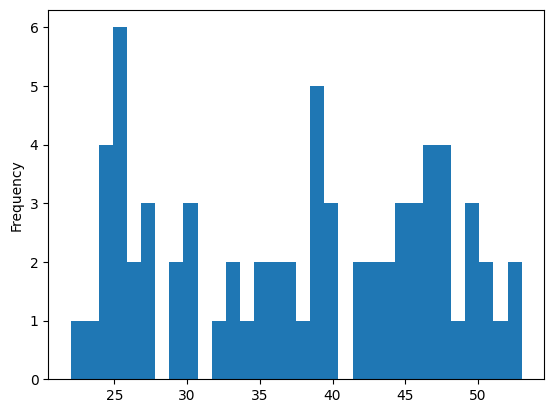

In [1433]:
# No dados de baja
disponibles = empleados.loc[empleados['F_BAJA'].isna()].copy()
# Edad de años
year = datetime.now().year
edadEmpleados = year - disponibles['F_NACIMIENTO'].astype('str').str.split('-').str[0].astype('int')

edadEmpleados.plot.hist(bins=edadEmpleados.max() - edadEmpleados.min() + 1)


#### Edad media y desviación típica de los empleados

In [1434]:
media, std = edadEmpleados.mean(), edadEmpleados.std()

print('La edad media es', round(media, 1), 'años y la desviación típica', round(std, 2))
print('Por lo que el ~68% de las edades están entre', round(media - std, 1), 'y', round(media + std, 1))

La edad media es 37.8 años y la desviación típica 9.46
Por lo que el ~68% de las edades están entre 28.3 y 47.2


### Proyectos


#### Número de proyectos activos, finalizados y total

In [1435]:
now = datetime.today().isoformat()[:10]

activos = proyectos.loc[proyectos['F_BAJA'].isna()]
activos = activos.loc[activos['F_FIN'].astype('str') <= now]
nactivos = len(activos)

finalizados = proyectos.loc[proyectos['F_BAJA'].isna()]
finalizados = finalizados.loc[finalizados['F_FIN'].astype('str') > now]
nfinalizados = len(finalizados)

nbaja = len(proyectos.loc[proyectos['F_BAJA'].notna()])

totalSinBajas = nfinalizados + nactivos

totalConBajas = totalSinBajas + nbaja


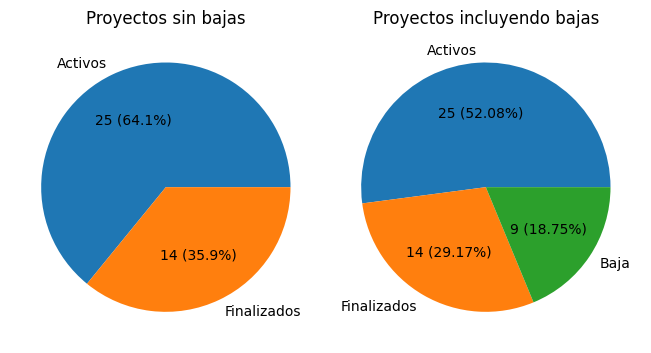

In [1436]:

_, (left, right) = plt.subplots(1, 2, layout='constrained')

left.set(title='Proyectos sin bajas', aspect=1)
right.set(title='Proyectos incluyendo bajas', aspect=1)


x = (nactivos, nfinalizados)
left.pie(
    x, labels=('Activos', 'Finalizados'),
    autopct=lambda n: f'{round(n * totalSinBajas / 100)} ({round(n, 2)}%)')

x = (nactivos, nfinalizados, nbaja)
right.pie(
    x, labels=('Activos', 'Finalizados', 'Baja'),
    autopct=lambda n: f'{round(n * totalConBajas / 100)} ({round(n, 2)}%)')

plt.show()

In [1437]:
print(
    'Proyectos:\n- {} Activos\n- {} Finalizados\n- {} Total\n- {} Total (con bajas)'.format(
        nactivos, nfinalizados, totalSinBajas, totalConBajas))

Proyectos:
- 25 Activos
- 14 Finalizados
- 39 Total (sin incluir bajas)
- 48 Total (con bajas)



#### Distribución de la duración de los proyectos (histograma)

In [1438]:
proyectos['F_INICIO'] = pd.to_datetime(proyectos['F_INICIO'], format='%y-%m-%d')
proyectos['F_FIN'] = pd.to_datetime(proyectos['F_FIN'], format='%y-%m-%d')

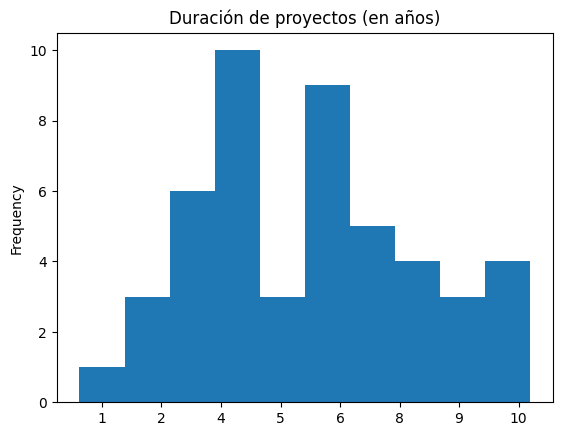

In [1439]:
def form(delta, _):
    y = int(delta // 365)
    return f'{y}'

duraciones = (proyectos['F_FIN'] - proyectos['F_INICIO']).dt.days
p = duraciones.plot.hist()
p.xaxis.set_major_formatter(form)
p.set(title='Duración de proyectos (en años)')
plt.show()


#### Distribución de proyectos por lugar

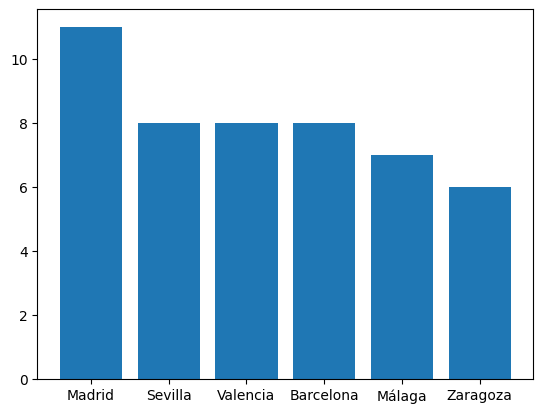

In [1440]:
lugares = proyectos['TX_LUGAR']
frecLugares = lugares.value_counts().reset_index()
plt.bar(frecLugares['TX_LUGAR'], frecLugares['count'])
plt.show()

### Proyectos y empleados

#### Distribución del número de proyectos a los que están asignados los empleados en activo. 

In [1441]:
asignados = asignaciones['ID_EMPLEADO']
asignados = asignados.value_counts().reset_index()
asignados = asignados.groupby('count').count().reset_index()
print(
    ',\n'.join(
        f'- Personas asignadas a {c} proyecto{"s" if c != 1 else ""}: {n}'
        for c, n in zip(asignados['count'], asignados['ID_EMPLEADO'])
    ))

- Personas asignadas a 1 proyecto: 12,
- Personas asignadas a 2 proyectos: 27,
- Personas asignadas a 3 proyectos: 28



#### Top 5 proyectos con más personas asignadas

In [1442]:
top5 = asignaciones['ID_PROYECTO']
top5 = (top5.value_counts(['ID_EMPLEADO']) * len(top5)).astype('int').reset_index()[:5]
top5proyectos = top5.join(
    proyectos[['ID_PROYECTO', 'TX_DESCRIPCION']],
    on='ID_PROYECTO',
    rsuffix='_new')[['ID_PROYECTO', 'TX_DESCRIPCION', 'proportion']]

top5proyectos

,ID_PROYECTO,TX_DESCRIPCION,proportion
0,33,Origin tea fully does,11
1,10,Cause member scale receive trail,7
2,23,Bare disappear special dust folks realize prac...,7
3,39,Game saw rocky driver ought today,7
4,17,Diameter too chest safety exchange,7



#### Lista de proyectos sin personas asignadas (detección de anomalía) 

In [1443]:
proyectosAsignados = asignaciones['ID_PROYECTO'].unique()
noasignados = ~proyectos['ID_PROYECTO'].isin(proyectosAsignados)

pnoasig = proyectos.loc[noasignados]
pnoasig.loc[pnoasig['F_BAJA'].isna()][['ID_PROYECTO', 'TX_DESCRIPCION', 'TX_OBSERVACIONES', 'TX_LUGAR', 'F_INICIO', 'F_FIN']]

,ID_PROYECTO,TX_DESCRIPCION,TX_OBSERVACIONES,TX_LUGAR,F_INICIO,F_FIN
8,8,Star equipment locate box no,Done cast welcome apart children lion prevent ...,Barcelona,2026-07-02,2033-03-25
21,21,Roll usually choice been further,Sale hair treated hunter river while review no...,Madrid,2028-06-21,2029-04-28
26,26,Main surface quietly,Desk corner mistake joy railroad fierce consta...,Madrid,2026-11-03,2034-08-24
31,31,Agree first see quick impossible,Atomic indeed factory perhaps imagine number s...,Barcelona,2028-10-13,2035-12-02
36,36,Whose became hill fine face activity,Bow dinner gravity bread believed position fai...,Málaga,2027-10-04,2034-01-09
40,40,Spider branch hat save origin,Nose how solid red strike specific shoot firm ...,Zaragoza,2028-05-07,2039-06-23
